In [1]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
摔車與沒摔車的flag
0: 沒摔
1: 摔
'''
isFall = 1
'''
file name
以下檔案記得要改名稱以及需事先建好輸出資料夾在result資料夾內
要先刪掉csv第二行空白行
要修改csv,請用atim or sublime打開
*****跑第一次時所有結果存在result
*****跑第二次時所有結果存在result2
'''
readFileName = './data4/left/11-35-03.csv'

writeFileName = './result4/left/11-35-03.csv'
accWriteFileName = './result4/left/11-35-03_acc.csv'
accpltFileName = './result4/left/11-35-03.png'
xaccpltFileName = './result4/left/11-35-03_accx.png'
yaccpltFileName = './result4/left/11-35-03_accy.png'
zaccpltFileName = './result4/left/11-35-03_accz.png'

In [3]:
# new data with acceleration
allData = []
accData = []
# x index
flag = 0
first_time = 0
large_time = 0
# acceleration and its index
normalAcc = []
normalIndex = []
fallAcc = []
fallIndex = []
# y index
maxAcc = 0.0

'''
X acceleration
'''
xNormalAcc = []
xFallAcc = []
xMinAcc = 0.0
xMaxAcc = 0.0
'''
Y acceleration
'''
yNormalAcc = []
yFallAcc = []
yMinAcc = 0.0
yMaxAcc = 0.0
'''
Z acceleration
'''
zNormalAcc = []
zFallAcc = []
zMinAcc = 0.0
zMaxAcc = 0.0

In [4]:
with open(readFileName) as File:
    reader = csv.reader(File)
    
    header = next(reader)
    header.append("Acc")
    allData.append(header)
    
    for row in reader:
        '''
        calculate each moment acceleration
        '''
        # remember first time
        if flag == 0:
            first_time = float(row[6])
        #
        
        powSum = math.pow(float(row[0]),2)+math.pow(float(row[1]),2)+math.pow(float(row[2]),2)
        sqrtResult = math.sqrt(powSum)
        columnData = row
        columnData.extend([sqrtResult])
        allData.append(columnData)
        accData.append(sqrtResult)
        # remember plot y index for acceleration
        if maxAcc < sqrtResult:
            maxAcc = sqrtResult
        # rememver plot x y z index for each acceleration
        if xMinAcc > float(row[0]):
            xMinAcc = float(row[0])
        if xMaxAcc < float(row[0]):
            xMaxAcc = float(row[0])
        if yMinAcc > float(row[1]):
            yMinAcc = float(row[1])
        if yMaxAcc < float(row[1]):
            yMaxAcc = float(row[1])
        if zMinAcc > float(row[2]):
            zMinAcc = float(row[2])
        if zMaxAcc < float(row[2]):
            zMaxAcc = float(row[2])
        # remember fall data for plotting
        if row[7] == '0':
            xNormalAcc.append(row[0])
            yNormalAcc.append(row[1])
            zNormalAcc.append(row[2])
            normalAcc.append(sqrtResult)
            normalIndex.append(float(row[6])-first_time)
            large_time = float(row[6])-first_time
            flag += 1
        else:
            xFallAcc.append(row[0])
            yFallAcc.append(row[1])
            zFallAcc.append(row[2])
            fallAcc.append([sqrtResult])
            fallIndex.append(float(row[6])-first_time)
            large_time = float(row[6])-first_time
            flag += 1

<IPython.core.display.Javascript object>


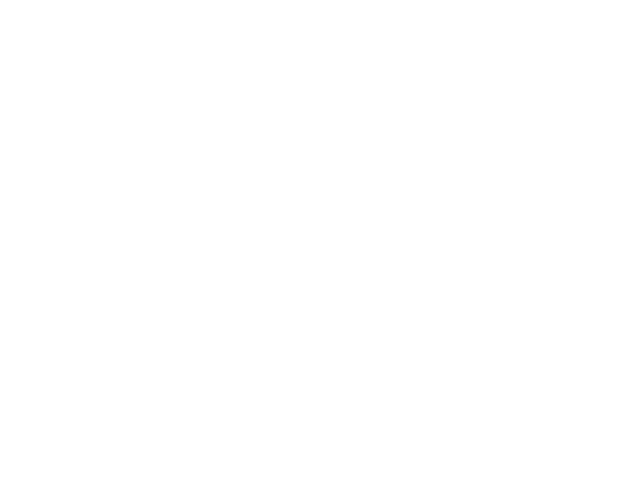

In [5]:
'''
plot 3D point X Y Z
red: fall
blue: normal
'''
%matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.suptitle('3D', fontsize=16)
ax = fig.gca(projection='3d')

xNormalAcc = list(map(float, xNormalAcc))
yNormalAcc = list(map(float, yNormalAcc))
zNormalAcc = list(map(float, zNormalAcc))
xFallAcc = list(map(float, xFallAcc))
yFallAcc = list(map(float, yFallAcc))
zFallAcc = list(map(float, zFallAcc))
ax.scatter(xNormalAcc, yNormalAcc, zNormalAcc, c='b', marker='o')
ax.scatter(xFallAcc, yFallAcc, zFallAcc, c='r', marker='o')
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')
ax.set_zlabel('z Label')
ax.view_init(elev=10, azim=10)

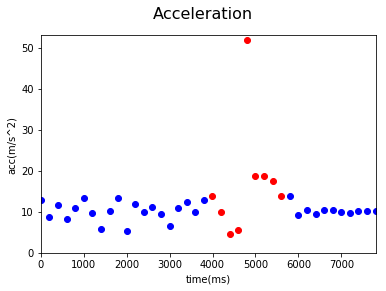

In [6]:
'''
plot the acceleration
red: fall down
blue: normal
'''
%matplotlib inline 
plt.suptitle('Acceleration', fontsize=16)

plt.xlabel('time(ms)', fontsize=10)
plt.ylabel('acc(m/s^2)', fontsize=10)
plt.plot(normalIndex, normalAcc, 'bo')
plt.plot(fallIndex, fallAcc, 'ro')
plt.axis([0, large_time, 0, int(maxAcc)+2])
plt.savefig(accpltFileName)
plt.show()

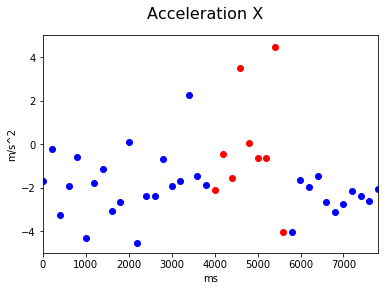

In [7]:
plt.suptitle('Acceleration X', fontsize=16)

plt.xlabel('ms', fontsize=10)
plt.ylabel('m/s^2', fontsize=10)
plt.plot(normalIndex, xNormalAcc, 'bo')
plt.plot(fallIndex, xFallAcc, 'ro')
plt.axis([0, large_time, int(xMinAcc)-1, int(xMaxAcc)+1])
plt.savefig(xaccpltFileName)
plt.show()

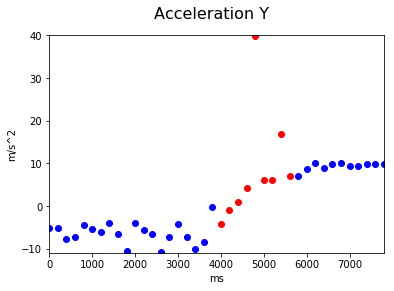

In [8]:
plt.suptitle('Acceleration Y', fontsize=16)

plt.xlabel('ms', fontsize=10)
plt.ylabel('m/s^2', fontsize=10)
plt.plot(normalIndex, yNormalAcc, 'bo')
plt.plot(fallIndex, yFallAcc, 'ro')
plt.axis([-1, large_time, int(yMinAcc)-1, int(yMaxAcc)+1])
plt.savefig(yaccpltFileName)
plt.show()

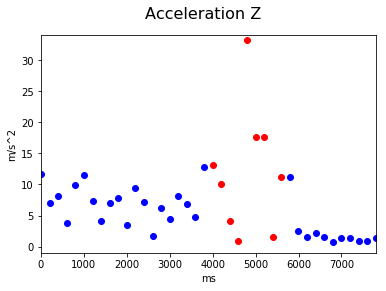

In [9]:
plt.suptitle('Acceleration Z', fontsize=16)

plt.xlabel('ms', fontsize=10)
plt.ylabel('m/s^2', fontsize=10)
plt.plot(normalIndex, zNormalAcc, 'bo')
plt.plot(fallIndex, zFallAcc, 'ro')
plt.axis([-1, large_time, int(zMinAcc)-1, int(zMaxAcc)+1])

plt.savefig(zaccpltFileName)
plt.show()

In [10]:
'''
write the csv with acceleration
'''
with open(writeFileName, 'w', newline='') as File:
    writer = csv.writer(File)
    writer.writerows(allData)
print("Writing complete")

Writing complete


In [11]:
with open(accWriteFileName, 'w', newline='') as File:
    writer = csv.writer(File)
    accData.append(isFall)
    writer.writerows([accData])
print("Writing complete")

Writing complete
